In [3]:
import numpy as np
import pandas as pd

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
#checking for missing values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True) #Handling missing values using pandas

In [8]:
df1=df.iloc[:, 1:3]
df2=df.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df1, df2, train_size=0.70, random_state=44)

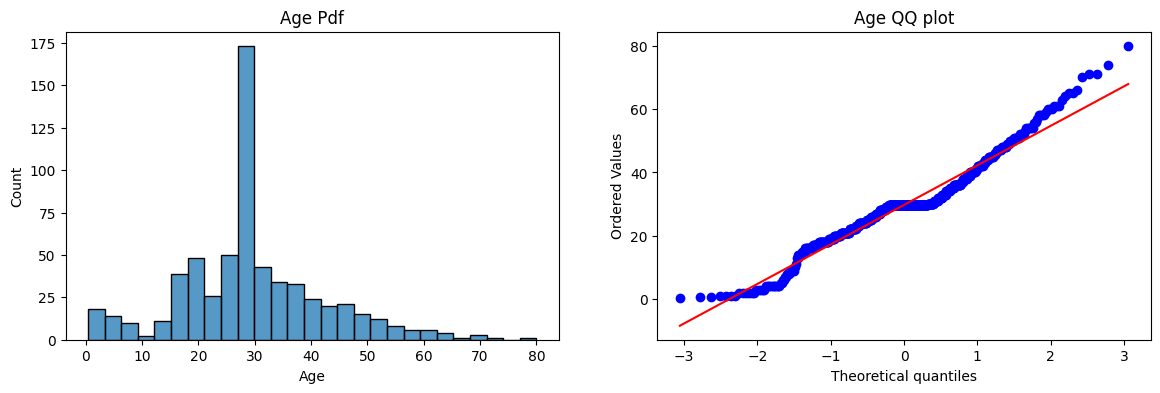

In [10]:
#EDA for Age
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'])
plt.title("Age Pdf")

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age QQ plot")

plt.show()

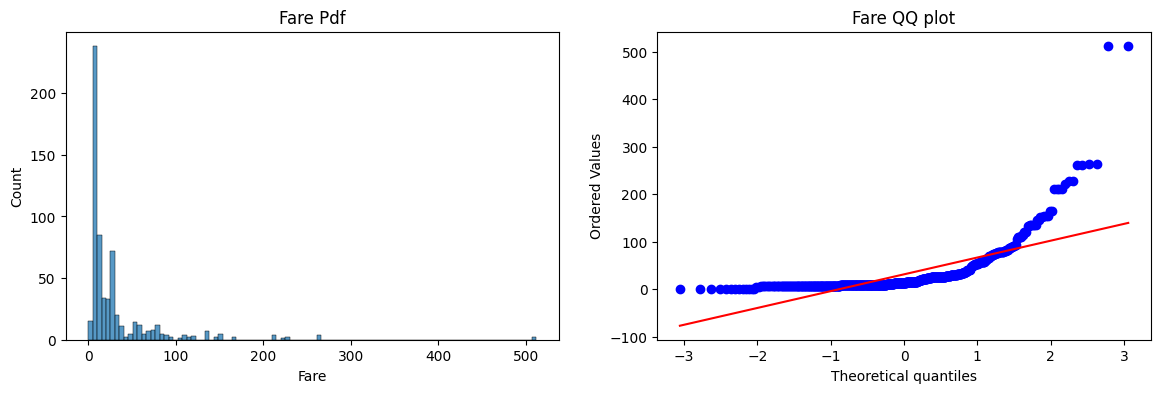

In [11]:
#EDA for Fare
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'])
plt.title("Fare Pdf")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare QQ plot")

plt.show()

In [12]:
#Since Attribute 'Fare' seems to be in right skewed so we need to make it in normal distribution

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [13]:
trans=ColumnTransformer([('log', FunctionTransformer(np.log1p),['Fare'])], remainder='passthrough' )
X_train_transformed=trans.fit_transform(X_train)
X_test_transformed=trans.transform(X_test)

In [17]:
logic=LogisticRegression()
logic.fit(X_train_transformed, y_train)
ypred=logic.predict(X_test_transformed, y_train)

print(accuracy_score(y_test, ypred))

TypeError: LinearClassifierMixin.predict() takes 2 positional arguments but 3 were given